In [5]:
import pandas as pd
import warnings; warnings.filterwarnings("ignore")
df=pd.read_csv("US_Accidents_March23.csv",nrows=200000)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,200000.000000,200000.000000,200000.000000,0.0,0.0,200000.000000,197165.00000,21390.000000,196757.000000,197797.000000,196737.000000,161560.000000,18352.000000
mean,2.410060,35.402579,-104.355926,NaN,NaN,0.033965,65.68728,30.399621,63.903195,30.001038,9.281449,8.512051,0.057414
std,0.494724,4.582634,17.870632,NaN,NaN,0.535451,16.43741,19.850108,21.603255,0.271988,1.991511,6.313318,0.493516
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-13.00000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.754379,-118.437279,NaN,NaN,0.000000,57.00000,19.200000,50.000000,29.910000,10.000000,5.000000,0.000000
50%,2.000000,34.120522,-117.370598,NaN,NaN,0.000000,66.90000,30.300000,66.000000,30.000000,10.000000,8.100000,0.000000
75%,3.000000,38.514824,-83.764334,NaN,NaN,0.010000,77.00000,38.800000,81.000000,30.100000,10.000000,10.400000,0.030000
max,4.000000,44.895218,-70.590034,NaN,NaN,80.890000,132.60000,111.000000,100.000000,33.040000,80.000000,822.800000,10.140000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     200000 non-null  object 
 1   Source                 200000 non-null  object 
 2   Severity               200000 non-null  int64  
 3   Start_Time             200000 non-null  object 
 4   End_Time               200000 non-null  object 
 5   Start_Lat              200000 non-null  float64
 6   Start_Lng              200000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           200000 non-null  float64
 10  Description            200000 non-null  object 
 11  Street                 200000 non-null  object 
 12  City                   199986 non-null  object 
 13  County                 200000 non-null  object 
 14  State                  200000 non-nu

In [8]:

columns_to_drop = [
    'ID',            
    'Source',        
    'End_Time',       
    'End_Lat',        
    'End_Lng',       
    'Description',   
    'Country',       
    'Timezone',       
    'Airport_Code',  
    'Wind_Chill(F)',  
    'Precipitation(in)'
]


df_cleaned = df.drop(columns=columns_to_drop)


print("Original number of columns:", df.shape[1])
print("Number of columns after dropping:", df_cleaned.shape[1])


print("\nPreview of the cleaned DataFrame:")
df_cleaned.head()

Original number of columns: 46
Number of columns after dropping: 35

Preview of the cleaned DataFrame:


,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,OH,45424,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 06:07:59,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,2016-02-08 06:49:27,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,OH,45176,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,2016-02-08 07:23:34,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,OH,45417,...,False,False,False,False,False,False,Night,Day,Day,Day
4,2,2016-02-08 07:39:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,...,False,False,False,False,True,False,Day,Day,Day,Day


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

median_temp = df_cleaned['Temperature(F)'].median()
df_cleaned['Temperature(F)'].fillna(median_temp, inplace=True)

median_visibility = df_cleaned['Visibility(mi)'].median()
df_cleaned['Visibility(mi)'].fillna(median_visibility, inplace=True)

median_humidity = df_cleaned['Humidity(%)'].median()
df_cleaned['Humidity(%)'].fillna(median_humidity, inplace=True)


In [10]:

mode_weather = df_cleaned['Weather_Condition'].mode()[0]
df_cleaned['Weather_Condition'].fillna(mode_weather, inplace=True)

mode_sunrise_sunset = df_cleaned['Sunrise_Sunset'].mode()[0]
df_cleaned['Sunrise_Sunset'].fillna(mode_sunrise_sunset, inplace=True)


df_cleaned.dropna(inplace=True)


In [11]:
print("Missing values after cleaning:")
print(df_cleaned[['Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Sunrise_Sunset']].isnull().sum())
print("-" * 40)

Missing values after cleaning:
Temperature(F)       0
Visibility(mi)       0
Weather_Condition    0
Sunrise_Sunset       0
dtype: int64
----------------------------------------


In [12]:


df_cleaned['Start_Time'] = pd.to_datetime(df_cleaned['Start_Time'])

df_cleaned['Hour'] = df_cleaned['Start_Time'].dt.hour
df_cleaned['Day_of_Week'] = df_cleaned['Start_Time'].dt.day_name()
df_cleaned['Month'] = df_cleaned['Start_Time'].dt.month

print("New time-based features created: Hour, Day_of_Week, Month")
print("-" * 40)


New time-based features created: Hour, Day_of_Week, Month
----------------------------------------


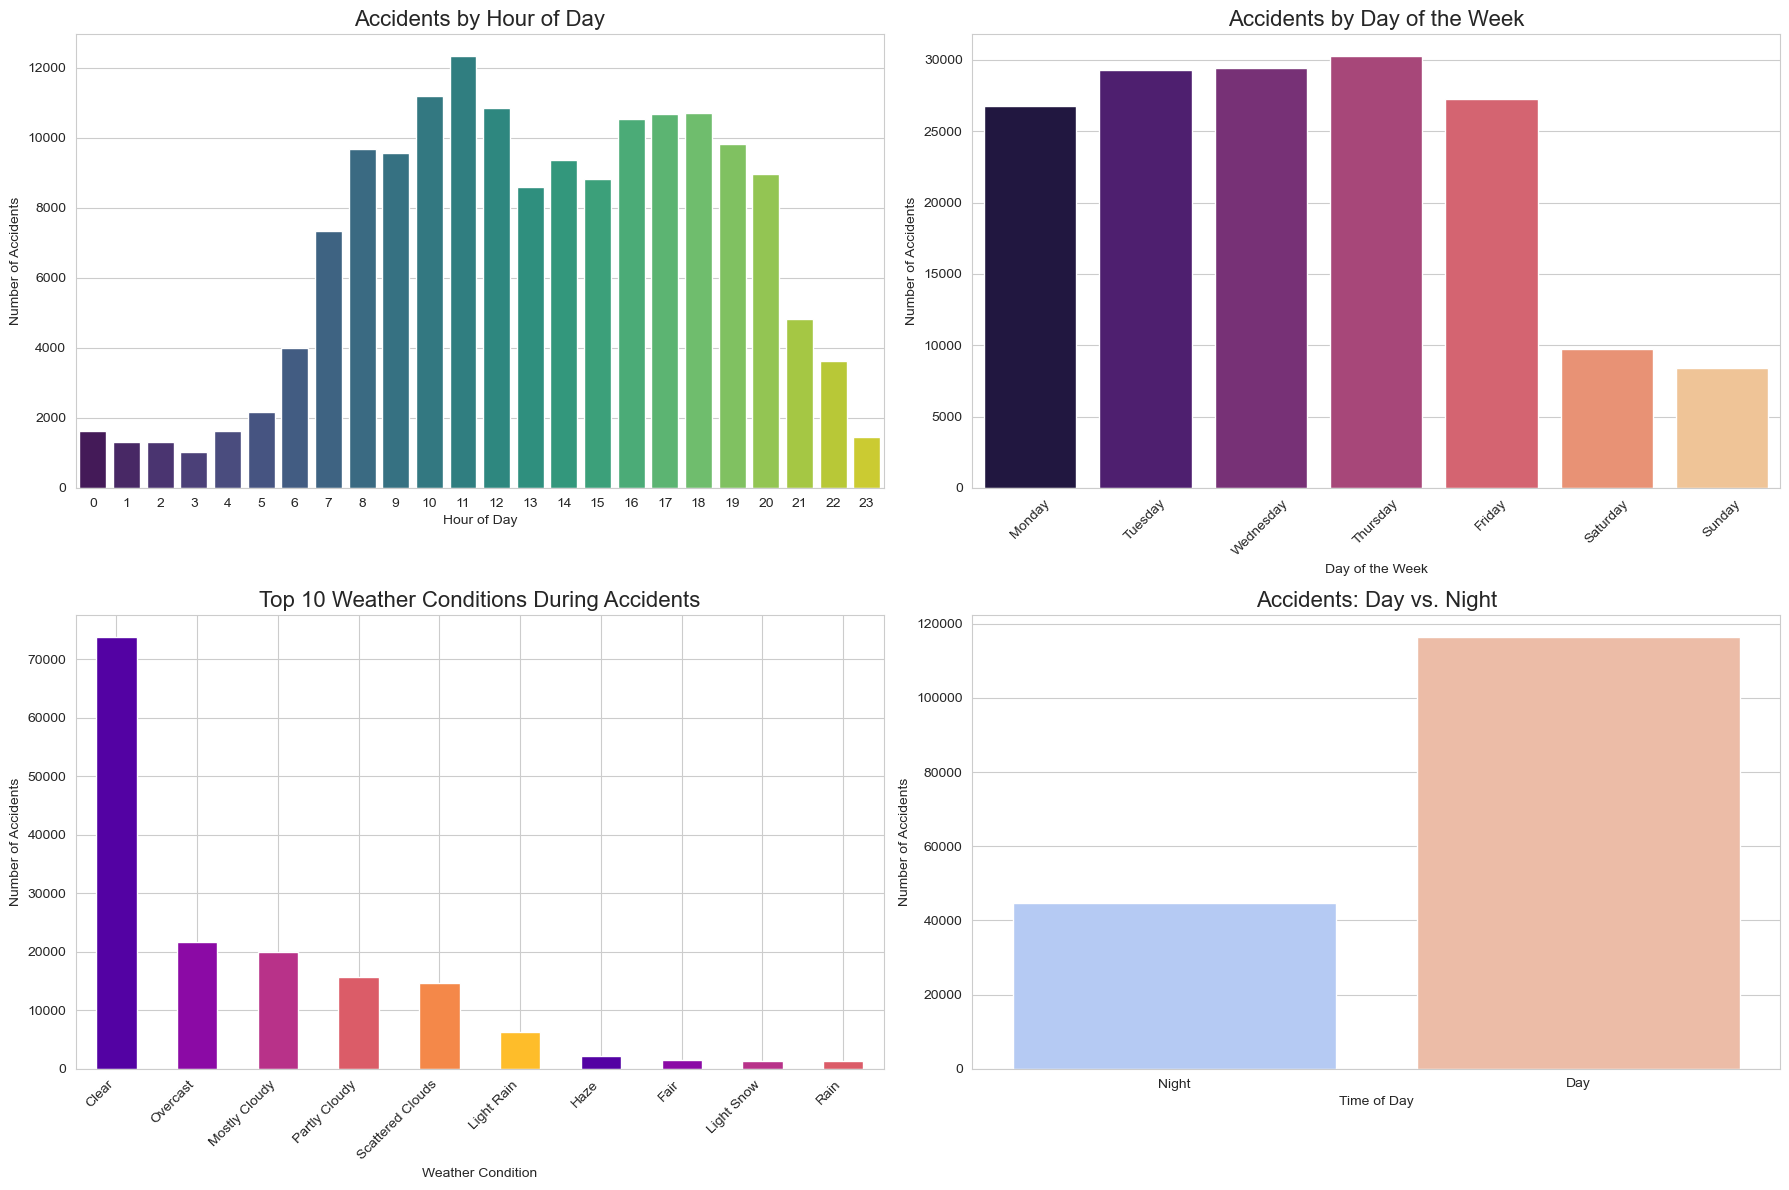

In [13]:

sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))


plt.subplot(2, 2, 1) 
sns.countplot(x='Hour', data=df_cleaned, palette='viridis')
plt.title('Accidents by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')


plt.subplot(2, 2, 2) 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_Week', data=df_cleaned, order=day_order, palette='magma')
plt.title('Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3) 
top_10_weather = df_cleaned['Weather_Condition'].value_counts().nlargest(10)
top_10_weather.plot(kind='bar', color=sns.color_palette('plasma'))
plt.title('Top 10 Weather Conditions During Accidents', fontsize=16)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')


plt.subplot(2, 2, 4) 
sns.countplot(x='Sunrise_Sunset', data=df_cleaned, palette='coolwarm')
plt.title('Accidents: Day vs. Night', fontsize=16)
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')


plt.tight_layout()


plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

features = [
    'Temperature(F)',
    'Visibility(mi)',
    'Humidity(%)',
    'Hour',
    'Day_of_Week',
    'Weather_Condition',
    'Sunrise_Sunset'
]
target = 'Severity'

In [15]:
X = df_cleaned[features]
y = df_cleaned[target]


X_encoded = X.copy()
for col in ['Day_of_Week', 'Weather_Condition', 'Sunrise_Sunset']:
    encoder = LabelEncoder()
    X_encoded[col] = encoder.fit_transform(X_encoded[col])

print("Data has been numerically encoded. Here's a preview:")
print(X_encoded.head())
print("-" * 40)

Data has been numerically encoded. Here's a preview:
   Temperature(F)  Visibility(mi)  Humidity(%)  Hour  Day_of_Week  \
2            36.0            10.0        100.0     6            1   
3            35.1             9.0         96.0     7            1   
4            36.0             6.0         89.0     7            1   
5            37.9             7.0         97.0     7            1   
6            34.0             7.0        100.0     7            1   

   Weather_Condition  Sunrise_Sunset  
2                 36               1  
3                 34               1  
4                 34               0  
5                 24               0  
6                 36               0  
----------------------------------------


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

Data split into 129032 training samples and 32258 testing samples.


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


model = DecisionTreeClassifier(max_depth=10, random_state=42)

print("Training the Decision Tree model...")
model.fit(X_train, y_train)
print("Model training complete!")
print("-" * 40)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training the Decision Tree model...
Model training complete!
----------------------------------------
Model Accuracy: 59.85%

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.61      0.91      0.73     19025
           3       0.54      0.15      0.23     13177
           4       0.00      0.00      0.00        31

    accuracy                           0.60     32258
   macro avg       0.29      0.27      0.24     32258
weighted avg       0.58      0.60      0.53     32258



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = [
    'Start_Lat',         
    'Start_Lng',
    'Temperature(F)',
    'Visibility(mi)',
    'Humidity(%)',
    'Hour',
    'Day_of_Week',
    'Weather_Condition',
    'Sunrise_Sunset',
    'Junction',          
    'Traffic_Signal',     
    'Stop'               
]
target = 'Severity'

X = df_cleaned[features]
y = df_cleaned[target]


X_encoded = X.copy()

for col in ['Day_of_Week', 'Weather_Condition', 'Sunrise_Sunset']:
    encoder = LabelEncoder()
    X_encoded[col] = encoder.fit_transform(X_encoded[col])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



model = RandomForestClassifier(n_estimators=100,      
                               max_depth=20,           
                               class_weight='balanced', 
                               random_state=42,
                               n_jobs=-1)             

print("Training the RandomForest model...")
model.fit(X_train, y_train)
print("Model training complete!")
print("-" * 40)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"New Model Accuracy: {accuracy * 100:.2f}%")
print("\nNew Classification Report:")
print(classification_report(y_test, y_pred))

Training the RandomForest model...
Model training complete!
----------------------------------------
New Model Accuracy: 81.92%

New Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.88      0.81      0.84     19025
           3       0.75      0.84      0.79     13177
           4       0.50      0.23      0.31        31

    accuracy                           0.82     32258
   macro avg       0.53      0.47      0.49     32258
weighted avg       0.82      0.82      0.82     32258



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df_binary = df_cleaned.copy()


df_binary = df_binary[df_binary['Severity'] != 1]


df_binary['Severity_Binary'] = df_binary['Severity'].apply(lambda x: 0 if x == 2 else 1)

print("Problem reframed to Minor (0) vs. Major (1) severity.")
print(df_binary['Severity_Binary'].value_counts())
print("-" * 40)


features = [
    'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Visibility(mi)', 'Humidity(%)',
    'Hour', 'Day_of_Week', 'Weather_Condition', 'Sunrise_Sunset',
    'Junction', 'Traffic_Signal', 'Stop'
]

target = 'Severity_Binary'

X = df_binary[features]
y = df_binary[target]


X_encoded = X.copy()
for col in ['Day_of_Week', 'Weather_Condition', 'Sunrise_Sunset']:
    encoder = LabelEncoder()
    X_encoded[col] = encoder.fit_transform(X_encoded[col])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



model_final = RandomForestClassifier(n_estimators=100,
                                     max_depth=20,
                                     random_state=42,
                                     n_jobs=-1)

print("Training the final binary classification model...")
model_final.fit(X_train, y_train)
print("Model training complete!")
print("-" * 40)


y_pred = model_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Minor (Sev 2)', 'Major (Sev 3/4)']))

Problem reframed to Minor (0) vs. Major (1) severity.
Severity_Binary
0    95775
1    65401
Name: count, dtype: int64
----------------------------------------
Training the final binary classification model...
Model training complete!
----------------------------------------
Final Model Accuracy: 84.87%

Final Classification Report:
                 precision    recall  f1-score   support

  Minor (Sev 2)       0.88      0.86      0.87     19174
Major (Sev 3/4)       0.81      0.83      0.82     13062

       accuracy                           0.85     32236
      macro avg       0.84      0.85      0.84     32236
   weighted avg       0.85      0.85      0.85     32236



In [20]:
import folium
from folium.plugins import HeatMap

print("Generating the interactive heatmap... This may take a moment.")


map_df = df_cleaned.sample(20000)


map_center = [39.8283, -98.5795]
accident_map = folium.Map(location=map_center, zoom_start=4)


heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in map_df.iterrows()]


HeatMap(heat_data).add_to(accident_map)


map_filename = 'accident_hotspot_map.html'
accident_map.save(map_filename)

print(f"\n✅ Success! Interactive map saved as '{map_filename}'.")


Generating the interactive heatmap... This may take a moment.

✅ Success! Interactive map saved as 'accident_hotspot_map.html'.
Find this file in your project folder and open it in your browser to see the results.
